In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
import shap

from sklearn.metrics import classification_report, roc_auc_score, zero_one_loss, accuracy_score


In [4]:
cd ..

C:\Users\danie\Documents\StageDaniel\research


In [5]:
cd research

[WinError 2] Het systeem kan het opgegeven bestand niet vinden: 'research'
C:\Users\danie\Documents\StageDaniel\research


In [6]:
data_name = 'clean_norm_poland'
data_dir = os.getcwd() + '/data/'
data_csv_file = data_dir + data_name + '_processed.csv'

# load data file from csv
df = pd.read_csv(data_csv_file, sep = ',')
data = df.as_matrix()
data_headers = list(df.columns.values)
N = data.shape[0]

# setup Y vector and Y_name
Y_col_idx = [0]
Y = data[:, Y_col_idx]
Y_name = [data_headers[j] for j in Y_col_idx]
Y[Y == 0] = -1

# setup X and X_names
X_col_idx = [j for j in range(data.shape[1]) if j not in Y_col_idx]
X = df.drop(df.columns[0], axis=1)
X_names = [data_headers[j] for j in X_col_idx]

Method .as_matrix will be removed in a future version. Use .values instead.


In [7]:
# model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=Y), 100)
model = XGBClassifier(max_depth=4,
        gamma=0.5,
        n_estimators=600,
        objective='binary:logistic',
        silent=True,
        nthread=1)
model.fit(X, Y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [8]:
# roc_auc_score(Y,model.predict(xgboost.DMatrix(X)))
roc_auc_score(Y,model.predict_proba(X)[:,1])

0.9963821400282047

In [ ]:
accuracy_score(Y,model.predict(X))

In [ ]:
plt.hist(model.predict_proba(X)[:,1], bins=100 )
plt.show()

In [ ]:
model.predict_proba(X)

In [ ]:
print(classification_report(Y, model.predict(X)))

In [ ]:
thresholds = np.arange(100)/50-1
for c in thresholds:
        y_hat = model.predict(xgboost.DMatrix(X))>c
        y_hat = y_hat*1
        print(y_hat)
        print(zero_one_loss((Y+1)/2, y_hat))

In [ ]:
print(classification_report(Y, ebm.predict(X)))

In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [ ]:
shap.initjs()
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values[:100,:], X.iloc[:100,:])

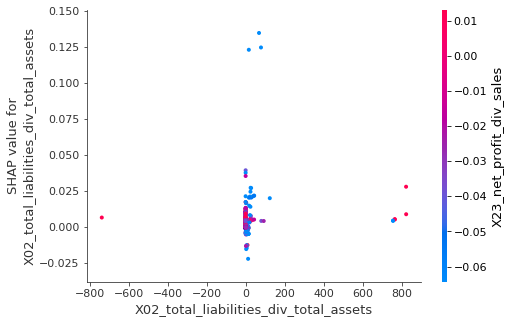

In [16]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot(X_names[1], shap_values, X)

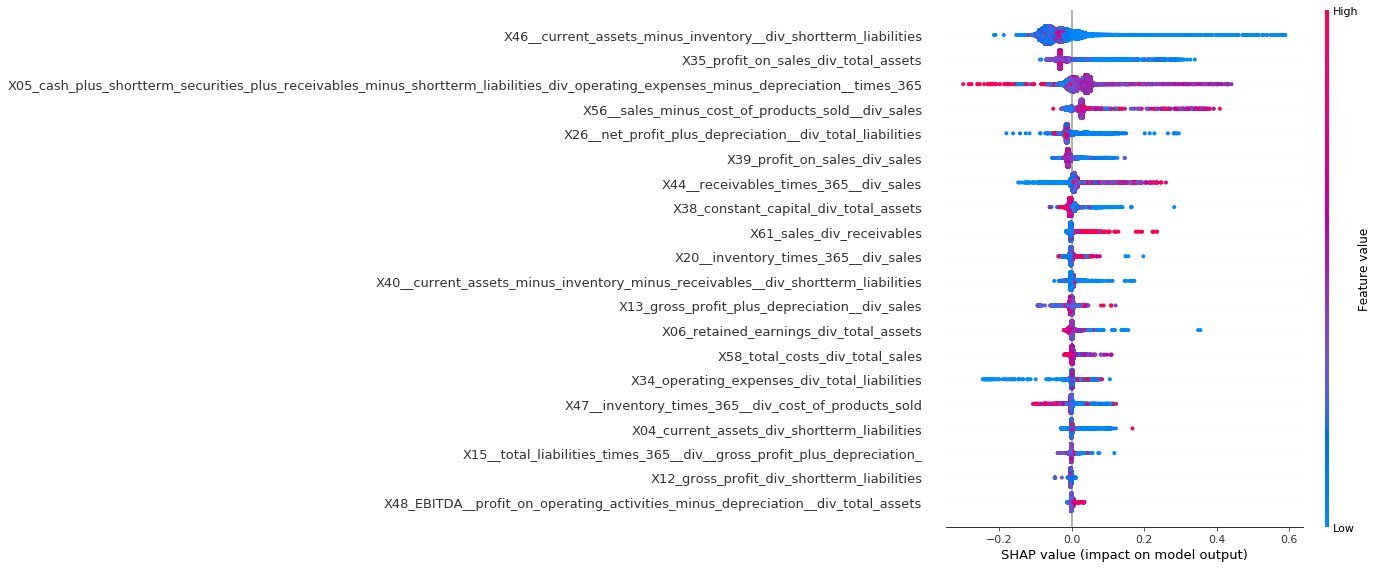

In [17]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

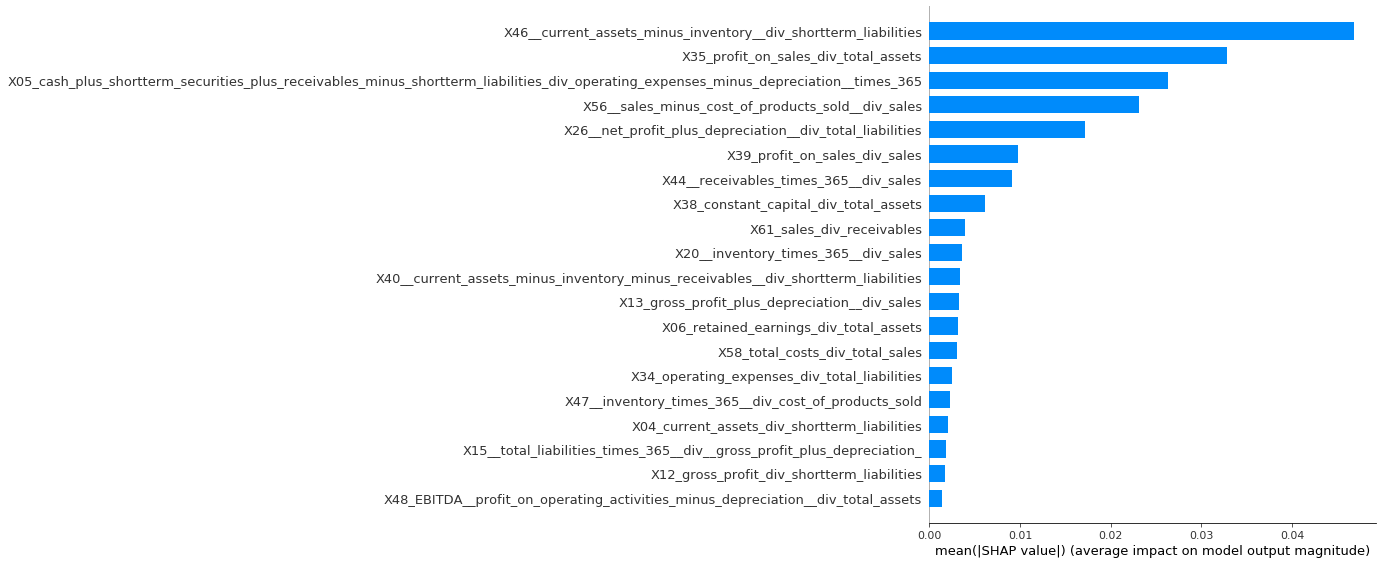

In [18]:
shap.summary_plot(shap_values, X, plot_type="bar")